In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

## Fully connected neural network

### Approach/Version changelog
- **V1.0** - Initial version w/ SGD (lr=0.01), 30 epochs and 1x Flatten, 3x Dense and 3x Dropout 20%
    - Result:
        | Set | Accuracy | Loss |
        | --- | -------- | ---- |
        | Train | 0.8134   | 0.5549  |
        | Valid | 0.8297   | 0.5060  |
        | Test | 0.8298   | 0.5086  |
- **V1.1** - Added EarlyStopping callback with weight restore (monitor validation loss, 5 patience, 0.001 delta) and set 50 epochs
    - Result:
        | Set | Accuracy | Loss |
        | --- | -------- | ---- |
        | Train | 0.8445   | 0.4543  |
        | Valid | 0.8583   | 0.4324  |
        | Test | 0.8565   | 0.4287  |
- **V1.2** - Switched SGD for Adam (lr=0.001)
    - Result:
        | Set | Accuracy | Loss |
        | --- | -------- | ---- |
        | Train | 0.6363   | 1.0540  |
        | Valid | 0.7421   | 0.8147  |
        | Test | 0.7378   | 0.8115  |
- **V1.3** - Changed to SGD Nesterov with 0.9 momentum
    - Result: nan loss
- **V1.3.1** - Added 1.0 clipnorm to Nesterov
    - Result:
        | Set | Accuracy | Loss |
        | --- | -------- | ---- |
        | Train | 0.8382   | 0.5177  |
        | Valid | 0.8575   | 0.4714  |
        | Test | 0.8478   | 0.4685  |
- **V1.3.2** - Removed clipnorm and set momentum to 0.7
    - Result: nan loss
- **V1.3.3** - Restored the momentum and set lr = 0.001
    - Result:
        | Set | Accuracy | Loss |
        | --- | -------- | ---- |
        | Train | 0.8613   | 0.4079  |
        | Valid | 0.8642   | 0.4224  |
        | Test | 0.8590   | 0.4225  |
- **V1.3.4** - Added performance scheduling with 0.5 factor, patience of 2 and min_lr of 1e-6 (result of several attempts tweaking)
    - Result:
        | Set | Accuracy | Loss |
        | --- | -------- | ---- |
        | Train | 0.9017   | 0.2869  |
        | Valid | 0.8796   | 0.3799  |
        | Test | 0.8761   | 0.3807  |
- **V1.3.5** - Introduction of batch normalization and less aggressive learning rate scheduling
    - Result:
        | Set | Accuracy | Loss |
        | --- | -------- | ---- |
        | Train | 0.9456   | 0.1621  |
        | Valid | 0.9040   | 0.2951  |
        | Test | 0.9015   | 0.3005  |
- **V1.3.6** - added amount of neurons (2x512 and 1x256)
    - Result:
        | Set | Accuracy | Loss |
        | --- | -------- | ---- |
        | Train | 0.9762   | 0.0718  |
        | Valid | 0.9186   | 0.2919  |
        | Test | 0.9127   | 0.2974  |

##### Import data

In [2]:
X = np.load('x_digits.npy')
Y = np.load('y_digits.npy')

X = X.reshape([-1, 129, 71, 1])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test_val, Y_val, Y_test_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=43)

In [3]:
print(X_train.shape)

(28504, 129, 71, 1)


##### Create model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = [129, 71]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

early_stop = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_test_val, Y_test_val), callbacks=[early_stop, lr_scheduler])

Epoch 1/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.3407 - loss: 1.8661 - val_accuracy: 0.6813 - val_loss: 0.9794 - learning_rate: 0.0010
Epoch 2/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.6374 - loss: 1.0569 - val_accuracy: 0.7663 - val_loss: 0.7363 - learning_rate: 0.0010
Epoch 3/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.7206 - loss: 0.8174 - val_accuracy: 0.7834 - val_loss: 0.6316 - learning_rate: 0.0010
Epoch 4/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 36s 40ms/step - accuracy: 0.7646 - loss: 0.6974 - val_accuracy: 0.8050 - val_loss: 0.5930 - learning_rate: 0.0010
Epoch 5/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.7869 - loss: 0.6211 - val_accuracy: 0.8359 - val_loss: 0.4960 - learning_rate: 0.0010
Epoch 6/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.8132 - loss: 0.5429 - val_accuracy: 0.8496 - val_loss: 0.4736 - learning_rate: 0.0010
Epoch 7/100
891/891 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.8

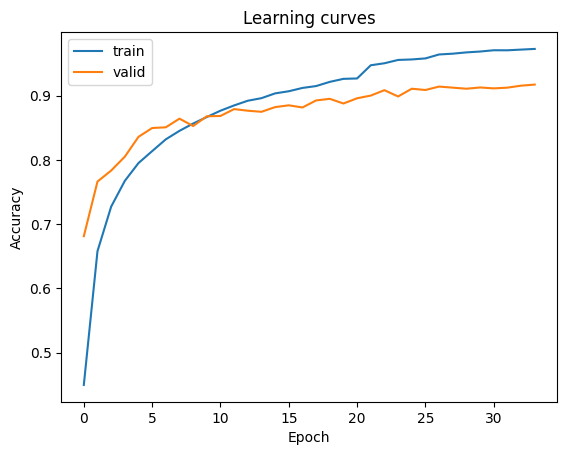

In [5]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'valid')
plt.legend()
plt.show()

In [6]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9047 - loss: 0.2950
Test loss: 0.2947
Test accuracy: 0.9075


##### Discussion on Fully Connected Neural Network Results

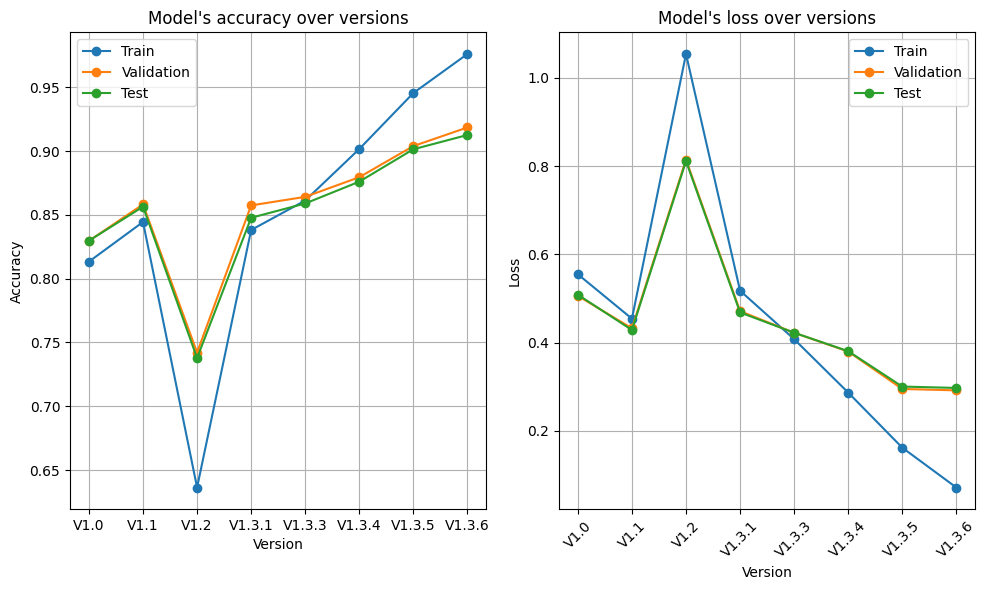

In [7]:
versions = ["V1.0", "V1.1", "V1.2", "V1.3.1", "V1.3.3", "V1.3.4", "V1.3.5", "V1.3.6"]

accuracy_train = [0.8134, 0.8445, 0.6363, 0.8382, 0.8613, 0.9017, 0.9456, 0.9762]
accuracy_valid = [0.8297, 0.8583, 0.7421, 0.8575, 0.8642, 0.8796, 0.9040, 0.9186]
accuracy_test =  [0.8298, 0.8565, 0.7378, 0.8478, 0.8590, 0.8761, 0.9015, 0.9127]

loss_train = [0.5549, 0.4543, 1.0540, 0.5177, 0.4079, 0.2869, 0.1621, 0.0718]
loss_valid = [0.5060, 0.4324, 0.8147, 0.4714, 0.4224, 0.3799, 0.2951, 0.2919]
loss_test =  [0.5086, 0.4287, 0.8115, 0.4685, 0.4225, 0.3807, 0.3005, 0.2974]

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].plot(versions, accuracy_train, marker='o', label='Train')
axes[0].plot(versions, accuracy_valid, marker='o', label='Validation')
axes[0].plot(versions, accuracy_test, marker='o', label='Test')
axes[0].set_title("Model's accuracy over versions")
axes[0].set_xlabel("Version")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].grid(True)

axes[1].plot(versions, loss_train, marker='o', label='Train')
axes[1].plot(versions, loss_valid, marker='o', label='Validation')
axes[1].plot(versions, loss_test, marker='o', label='Test')
axes[1].set_title("Model's loss over versions")
axes[1].set_xlabel("Version")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The approach chosen was to to train an FCNN model with 8 layers and experiment with different options such as optimizers, learning rate schedulers and similar.
1. The first version *V1.0* was to find out the base layer setup for the model w/ SGD as optimizer.
2. Second version *V1.1* was to add EarlyStopping callback with weight restore to avoid future overfitting and find correct weights.
3. Third version *V1.2* was switching optimizer from SGD to Adam. This resulted in significant drop in accuracy and increase in loss, so it was reverted.
4. Due to issues with Adam, fourth version *V1.3* was to switch SGD to Nesterov with 0.9 momentum. This put the valus of accuracy and loss back on track. However, due to default learining rate left (0.01) resulted in exploding gradient and nan loss. Thus
5. The *V1.3.1* version introduced clipnorm set to 1.0 to prevent that.
6. Further versions *(V1.3.2, V1.3.3)* were experiments on the same model but with different learning rates and momentum values and without clipnorm.
7. The version *V1.3.4* introduced performance scheduling. This was the section that took a bit of time, since it includes tweaking both EarlyStopping, epochs, and performance scheduling. The result was setting the patience to 2, min_lr=1e-6 and aggressive factor of 0.5.
8. The version *V1.3.5* was an experiment with batch normalization and changing the patience to 3 for less aggressive approach.
9. In version *V1.3.6* the amount of neurons was increased just to see what would happen.


The difference in loss and accuracy between train and test suggested some overfitting was happening, thus version *V1.3.7* had several experiments with dropout rate as well as L1 and L2 (we dropped Adam in *V1.3* so we are allowed to do so). However, the result was only an increased loss and little difference in gap between train and test.

The above presented is the result we deemed satisfactory.

## Convolutional neural network 

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter

In [4]:
X = np.load('x_digits.npy')
Y = np.load('y_digits.npy')

X.shape, Y.shape


((35631, 129, 71), (35631,))

In [5]:
X = X.reshape([-1, 129, 71, 1])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_train = X_train.reshape([-1, 129, 71, 1])
# X_test = X_test.reshape([-1, 129, 71, 1])

X_train.shape
X_test.shape

(7127, 129, 71, 1)

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(129,71,1)))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation="elu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="elu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="elu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation="elu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax")) 

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)

optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.002)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=30, validation_split=0.2, callbacks=[EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.1656 - loss: 3.7053 - val_accuracy: 0.2112 - val_loss: 2.0315 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 22s 30ms/step - accuracy: 0.2576 - loss: 1.9414 - val_accuracy: 0.5032 - val_loss: 1.4012 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.6274 - loss: 1.0783 - val_accuracy: 0.8106 - val_loss: 0.5524 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8490 - loss: 0.4561 - val_accuracy: 0.8742 - val_loss: 0.4003 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.9079 - loss: 0.2812 - val_accuracy: 0.8948 - val_loss: 0.3441 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 24s 34ms/step - accuracy: 0.9341 - loss: 0.2071 - val_accuracy: 0.8870 - val_loss: 0.3368 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9428 - l

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9243 - loss: 0.2822
Test loss: 0.2993
Test accuracy: 0.9197


In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(129,71,1)))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation = "relu", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5, restore_best_weights = "True")
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 2)

optimizer = tf.keras.optimizers.AdamW(learning_rate = 0.001, weight_decay = 0.002)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.2, callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.1697 - loss: 3.0270 - val_accuracy: 0.6930 - val_loss: 0.8725 - learning_rate: 0.0010
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.7870 - loss: 0.6527 - val_accuracy: 0.8841 - val_loss: 0.3596 - learning_rate: 0.0010
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.9076 - loss: 0.2839 - val_accuracy: 0.9035 - val_loss: 0.2991 - learning_rate: 0.0010
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.9407 - loss: 0.1826 - val_accuracy: 0.9125 - val_loss: 0.2819 - learning_rate: 0.0010
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.9529 - loss: 0.1405 - val_accuracy: 0.8791 - val_loss: 0.4314 - learning_rate: 0.0010
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9664 - loss: 0.1017 - val_accuracy: 0.9146 - val_loss: 0.2916 - learning_rate: 0.0010
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.9831 - l

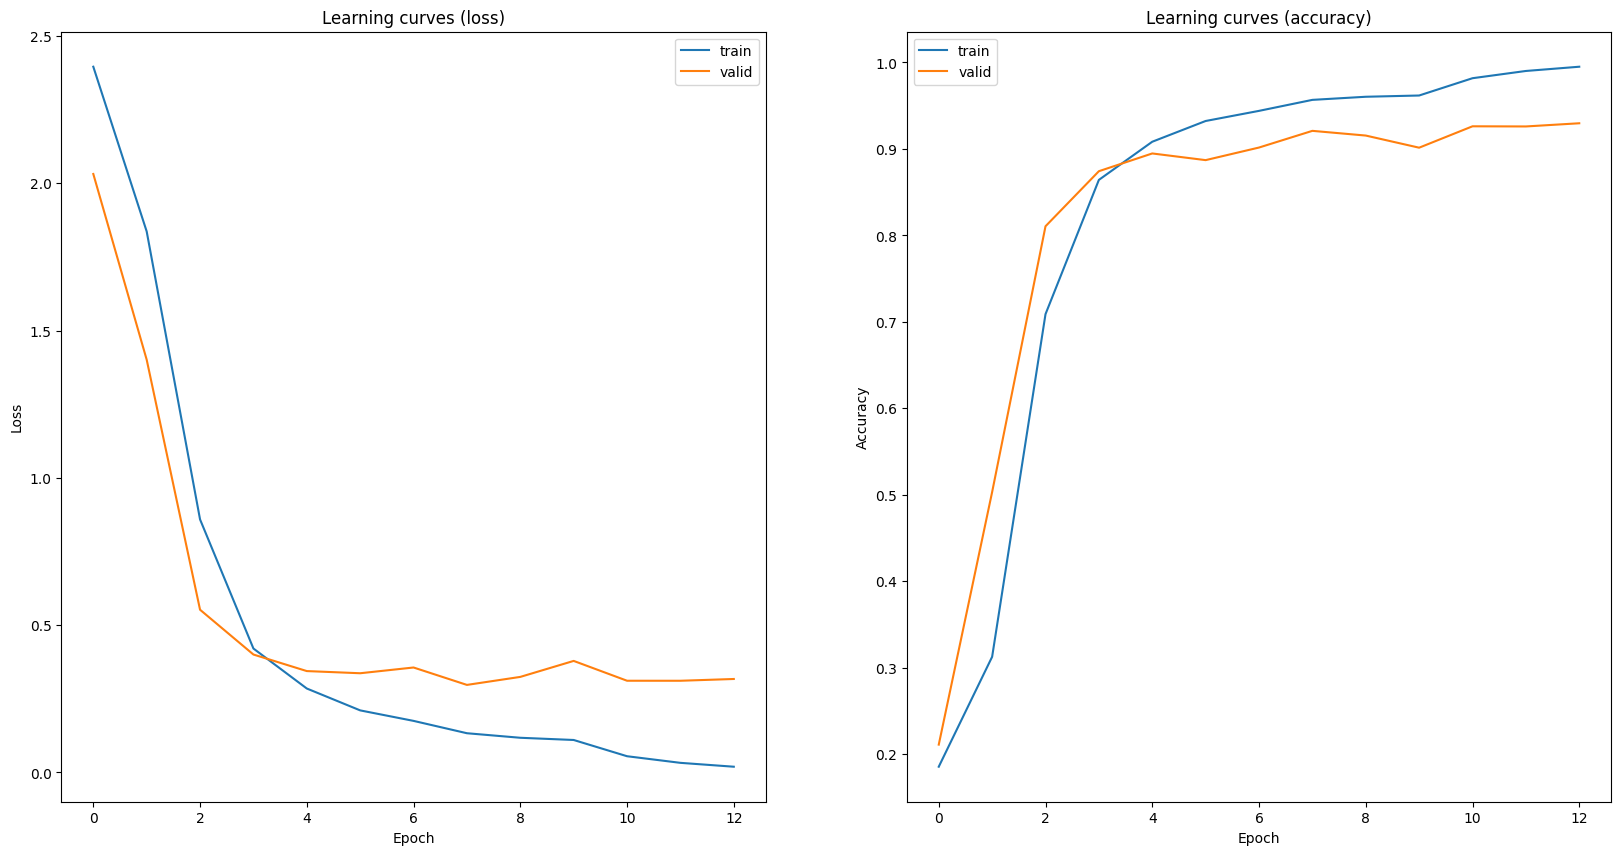

In [7]:
figure = plt.figure(figsize=(20, 10))
ax = figure.add_subplot(1, 2, 1, title='Learning curves (loss)')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.plot(history.history['loss'], label = 'train')
ax.plot(history.history['val_loss'], label = 'valid')
ax.legend()

ax = figure.add_subplot(1, 2, 2, title='Learning curves (accuracy)')
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.plot(history.history['accuracy'], label = 'train')
ax.plot(history.history['val_accuracy'], label = 'valid')
ax.legend()

plt.show()

#### Version 0.1
Starting with the basic setup of the CNN:</br>
-LeakyReLu as activation function - to avoid dead neurons</br>
-size of the feature map being 3x3</br>
-using EarlyStopping and LearningRate callbacks</br>
The model has struggled to pass 20%.</br>
#### Version 0.2
-ELU as activation function - also to prevent dead neurons</br>
-ELU is also a good choice for improving stability (the jumps are less sudden) as well as faster converge with fewer training epochs</br>
-Early stopping and the feature map stayed the same</br>
#### Version 0.3
-ReLu as activation function</br>
Both Version02 and 03 perfomed very well in terms of accuracy (98-99%) with a tendency to overfit ~0.30.</br>

#### Final Version
In the last verion of CNN, we have added additional layers of 2DPooling, Batchnormalization.</br>
The feature map has been expanded to much higher degree compared to the previous verions of the model.</br>
All of that was done primarily in order to deal with the models tendency to overfit.</br>
The model performed exceptionally well ~98% accuracy and the above mentioned choices reduced tendency for overfitting -0.2</br>

In [21]:
model = tf.keras.Sequential()
 
model.add(tf.keras.layers.Input(X_train[0].shape))
 
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_normal", padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
 
model.add(tf.keras.layers.GlobalAveragePooling2D())
 
model.add(tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.BatchNormalization())
 
model.add(tf.keras.layers.Dense(10, activation="softmax"))
 
EarlyStoppingCB = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
LearningRateCB = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=1)
 
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.0005, weight_decay=0.005)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
 
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True
)
 
datagen_val = tf.keras.preprocessing.image.ImageDataGenerator()
 
history = model.fit(X_train, Y_train, epochs = 30, validation_split=0.2, callbacks = [EarlyStoppingCB, LearningRateCB])

Epoch 1/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 304s 412ms/step - accuracy: 0.4160 - loss: 1.7232 - val_accuracy: 0.6729 - val_loss: 1.0351 - learning_rate: 5.0000e-04
Epoch 2/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 294s 412ms/step - accuracy: 0.8511 - loss: 0.4904 - val_accuracy: 0.8199 - val_loss: 0.5580 - learning_rate: 5.0000e-04
Epoch 3/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 282s 396ms/step - accuracy: 0.9075 - loss: 0.3040 - val_accuracy: 0.8607 - val_loss: 0.4530 - learning_rate: 5.0000e-04
Epoch 4/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 278s 390ms/step - accuracy: 0.9242 - loss: 0.2402 - val_accuracy: 0.8163 - val_loss: 0.5448 - learning_rate: 5.0000e-04
Epoch 5/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 278s 390ms/step - accuracy: 0.9470 - loss: 0.1729 - val_accuracy: 0.9312 - val_loss: 0.2066 - learning_rate: 2.5000e-04
Epoch 6/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 278s 390ms/step - accuracy: 0.9528 - loss: 0.1526 - val_accuracy: 0.8997 - val_loss: 0.2998 - learning_rate: 2.5000e-04
Epoch 7/30
713/713 ━━━━━━━━━━━━━━━━━━━━ 

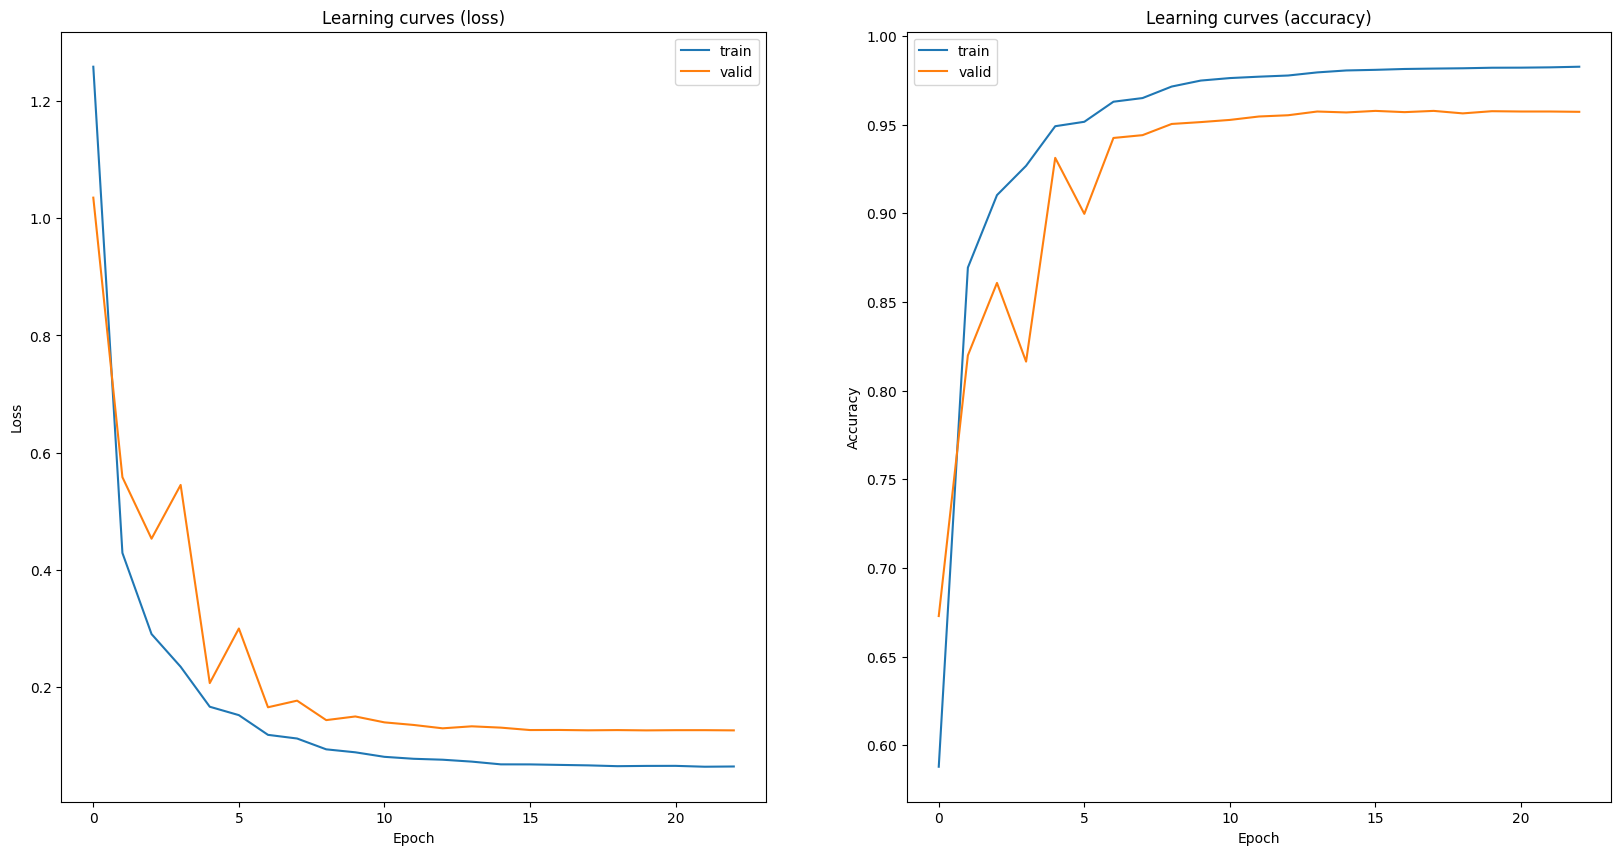

In [22]:
figure = plt.figure(figsize=(20, 10))
ax = figure.add_subplot(1, 2, 1, title='Learning curves (loss)')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.plot(history.history['loss'], label = 'train')
ax.plot(history.history['val_loss'], label = 'valid')
ax.legend()

ax = figure.add_subplot(1, 2, 2, title='Learning curves (accuracy)')
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.plot(history.history['accuracy'], label = 'train')
ax.plot(history.history['val_accuracy'], label = 'valid')
ax.legend()

plt.show()

#### Class Probabilities & Confusion matrix
-For evaluation of the model accuracy and struggles we would like to start with the confusion matrix</br>
-From above matrix we can clearly see that the number the model is struggling the most is 9 (also from spectograms)</br>
-It seems that the model has missclassified 9 both as 1 or 2</br>
-The model was also missclassifying 1 (namely predicting 4 or 9 instead)</br>

The heatmap analysis showcases the pairs the models struggled with using confidence treshhold</br>
This is just an additional analysis that furthmore clarifies most freqent mistakes.</br>
The treshold works as a way of eliminating easy guesses (it is not showing the guesses with confidence over 50%) highlithing even more where the model struggled.</br>
The heatmap serves as focusing on mistakes of the model where the standard confusion matrix is a overall overview of the results.</br>

223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


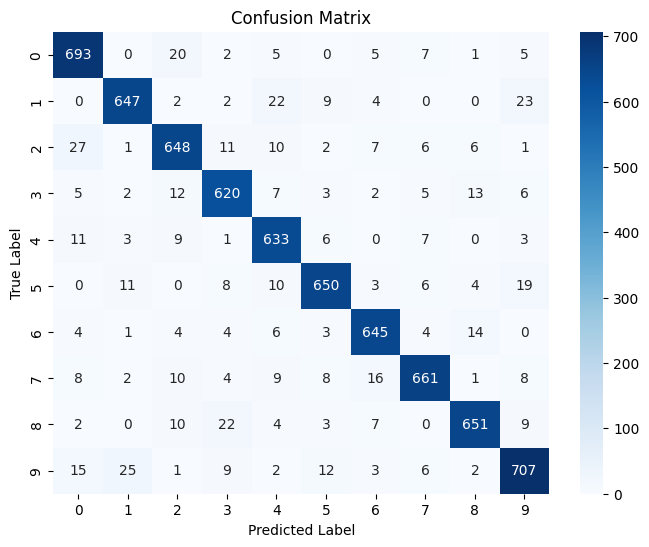

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

conf_matrix = confusion_matrix(Y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


891/891 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step


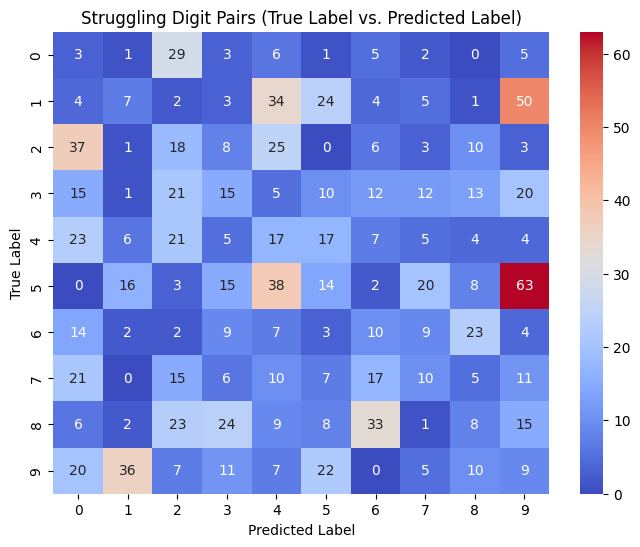

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
predictions = model.predict(X_train)
threshold = 0.5

struggling_pairs = Counter()

for probs, true_label in zip(predictions, Y_train):
    predicted_label = np.argmax(probs)  
    max_prob = np.max(probs)  
    if max_prob < threshold or predicted_label != true_label:
        struggling_pairs[(int(true_label), int(predicted_label))] += 1  

confusion_matrix = np.zeros((10, 10))

for (true_label, predicted_label), count in struggling_pairs.items():
    confusion_matrix[true_label, predicted_label] = count

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Struggling Digit Pairs (True Label vs. Predicted Label)')
plt.show()

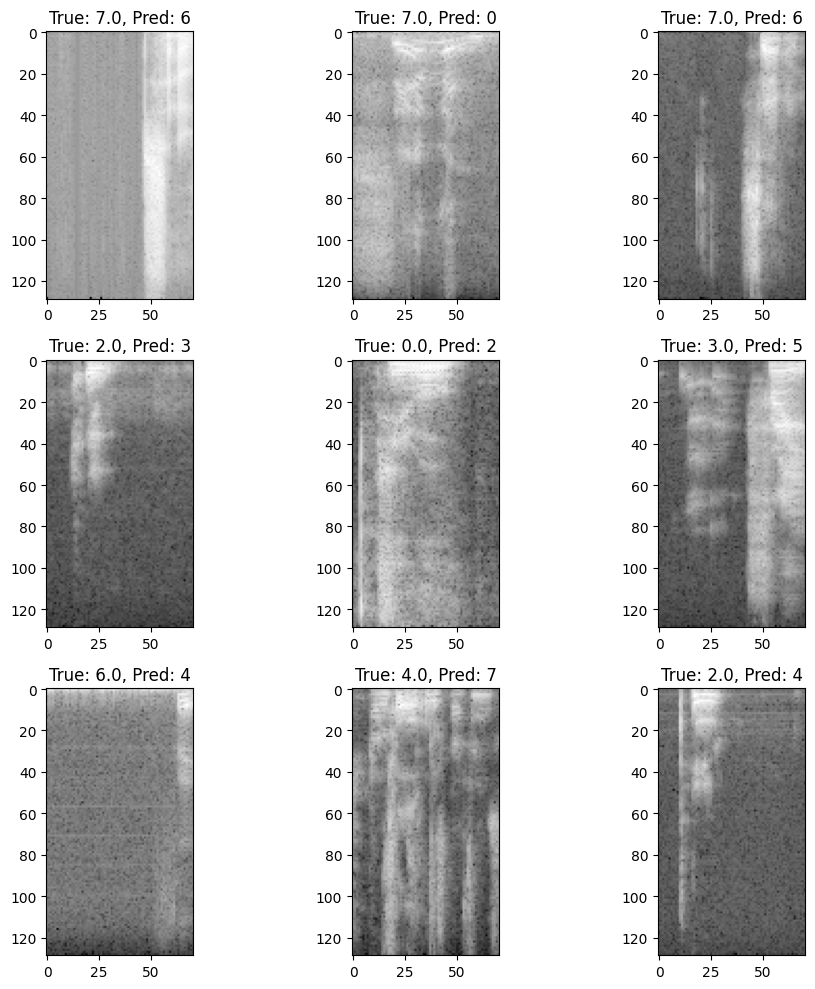

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(10,10))

misclassified_indices = np.where(y_pred_classes != Y_test)[0]  
misclassified_samples = np.random.choice(misclassified_indices, 9, replace=False)  

for i, idx in enumerate(misclassified_samples):
    ax = axes[i//3, i%3]
    ax.imshow(X_test[idx].squeeze(), cmap="gray") 
    ax.set_title(f"True: {Y_test[idx]}, Pred: {y_pred_classes[idx]}")
    ax.axis("on")

plt.tight_layout()
plt.show()


## Final Conclusions and Discussion
The comparison of the two neural networks (Fully connected vs Convolutional) on classifying spoken digits was very interesting experience.</br>
Preparing to this assignment, we were aware of the superiority of the CNN regarding that task.</br>
Generally, FCNN should be better for handling structured data (such as numerical inputs) and CNN should be better with images/audio.</br>
Convolutional Neural Network seems to be more powerful with the downside of being very demanding in terms of computational power (as well as is it quite prone to overfitting too)</br>
Quicker compilation time of Fully Connected Neural Network paired with equally good accuracy is definitely a advantage of this approach.</br>
It is imporant to note however, that FCNN required a lot more tweaks and versions to accomplish similar results</br>
We are overall satisfied with the effects and deem this assignment as success</br>